### PREDICTIVE ANALYSIS ON AIR QUALITY DATA USING MACHINE LEARNING ALGORITHMS.

IMPORTING NECESSARY LIBRARIES FOR PERFORMING EDA 

In [1]:
#importing necessary libraries

import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
import matplotlib.mlab as mlab
import matplotlib
from matplotlib.pyplot import figure

path = os.getcwd() #get the path of current working dir
print(os.listdir(path+"/input")) #print the date file present in "../input"

['data.csv']


To get a general idea of what the attributes, shape, size and dimensions of the dataset are. 

In [2]:
data = pd.read_csv(path+ "/input/data.csv" , low_memory=False) #read the .csv into a DataFrame

# dataframe.size
size = data.size
  
# dataframe.shape
shape = data.shape
  
# dataframe.ndim
df_ndim = data.ndim
  
# printing size and shape
print("Size = {}\n\nShape ={}\n\nShape[0] x Shape[1] = {}".
format(size, shape, shape[0]*shape[1]))
  
# printing ndim
print("\nDimension of dataframe = {}".
format(df_ndim))
#to get a preview of the dataset used and its attributes we use the head() function
data.head() 

Size = 5664646

Shape =(435742, 13)

Shape[0] x Shape[1] = 5664646

Dimension of dataframe = 2


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


As we can see, the dataset records 5 different types pollutants measured over the years in different states and cities of India. SO2 and NO2 are ambient air pollutants, whereas rspm, spm and pm2_5 are susended air pollutants.

SO2 is emitted by the burning of fossil fuels, especially coal. The gas can get converted to particulate matter through chemical reactions in the air. It can also result in acid rain that can hurt the environment, and in particular, crops. NO2 is also generated from burning of fuels, and its chief source of emissions in cities are vehicles. High levels of NO2 can worsen the symptoms of those with respiratory diseases, and also cause acid rain. NO2 can also form particulate matter and ozone, both of which are harmful to health.
Suspended Particulate Matter (SPM) in air is considered a criteria to indicate air quality whereas Respirable suspended particulate matter or RSPM is a causative agent of mortality and morbidity. Small particles aggravate respiratory and cardiac symptoms in the short term and trigger lung cancer in the long term.

In the above five entries, there are certain attributes that provide secondary information and do not conribute to the analysis. We will drop them using the drop() function. 

In [3]:
#drop(self, labels, axis, index, columns, level, inplace, errors)

to_drop = ['stn_code','sampling_date','agency','location_monitoring_station']
data.drop(axis=1, columns=to_drop, inplace=True)

data.head() #First five entries after dropping to_drop columns.

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,1990-03-01


In [4]:
data.describe()


,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


We use the describe() function to generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. The above table gives us the count, mean, standard deviation (std), min, max, 25 percentile, 50 percentile and 75 percentile values for each column. 

We can also plot the DataFrame that is obtained by loading the output of describe() into a DataFrame object with the method plot(). However, for that to happen we need to first execute %matplotlib inline.

<AxesSubplot:>

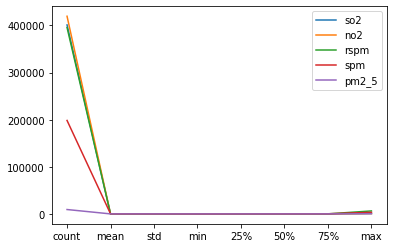

In [5]:
%matplotlib inline

summary = data.describe()
df = pd.DataFrame(summary) #load the summary obtained into a DataFrame object
df.plot()